In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from tqdm import tqdm

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
train_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/resnet_ensemble_centercrops_newtargets_w_ctrl/train_latents.h5")
val_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/resnet_ensemble_centercrops_newtargets_w_ctrl/val_latents.h5")
test_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/resnet_ensemble_centercrops_newtargets_w_ctrl/test_latents.h5")

train_latents["type"] = "train"
val_latents["type"] = "val"
test_latents["type"]= "test"

latents = train_latents.append(val_latents).append(test_latents)

In [4]:
label_dict = {
    "AKT1S1": 0,
    "ATF2": 1,
    "ATF4": 2,
    "BAX": 3,
    "BCL2L11": 4,
    "BRAF": 5,
    "CASP8": 6,
    "CDC42": 7,
    "CDKN1A": 8,
    "CEBPA": 9,
    "CREB1": 10,
    "CXXC4": 11,
    "DIABLO": 12,
    "E2F1": 13,
    "EIF4EBP1": 14,
    "ELK1": 15,
    "EMPTY": 16,
    "ERG": 17,
    "HRAS": 18,
    "IKBKB": 19,
    "IRAK4": 20,
    "JUN": 21,
    "MAP2K3": 22,
    "MAP3K2": 23,
    "MAP3K5": 24,
    "MAP3K9": 25,
    "MAPK7": 26,
    "MKNK1": 27,
    "MYD88": 28,
    "PKIA": 29,
    "PRKACA": 30,
    "PRKCE": 31,
    "RAF1": 32,
    "RELB": 33,
    "RHOA": 34,
    "SDHA": 35,
    "SMAD4": 36,
    "SRC": 37,
    "SREBF1": 38,
    "STK3": 39,
    "TSC2": 40,
    "WWTR1": 41,
}
label_dict = dict(zip(list(label_dict.values()), list(label_dict.keys())))

<IPython.core.display.Javascript object>

In [26]:
def plot_embs(latents, label_dict, random_state=1234):
    color_dict = {"train": "tab:blue", "val": "tab:green", "test": "tab:red"}
    tmp = latents.copy()
    latents = tmp.loc[:, ~latents.columns.isin(["labels", "type"])]
    zs = StandardScaler().fit_transform(latents)
    labels = tmp.loc[:, "labels"].map(label_dict)
    types = tmp.loc[:, "type"]

    embs = UMAP(random_state=random_state).fit_transform(zs)

    for target in tqdm(np.unique(labels)):
        fig, ax = plt.subplots(figsize=[12, 8])
        for t in ["train", "val", "test"]:
            e = embs[types == t, :]
            l = labels[types == t]
            ax.scatter(
                e[l == target, 0],
                e[l == target, 1],
                c=color_dict[t],
                alpha=0.8,
                label="{}_{}".format(t.upper(), target.upper()),
                s=2,
            )
        ax.scatter(
            embs[labels != target, 0],
            embs[labels != target, 1],
            c="tab:gray",
            alpha=0.02,
            label="REST",
            s=2,
        )
        ax.set_xlabel("umap_0")
        ax.set_ylabel("umap_1")
        ax.set_title("Embeddings for {} vs REST".format(target.upper()))
        plt.legend()
        plt.show()
        plt.close()
    return embs

<IPython.core.display.Javascript object>

  0%|          | 0/42 [00:00<?, ?it/s]

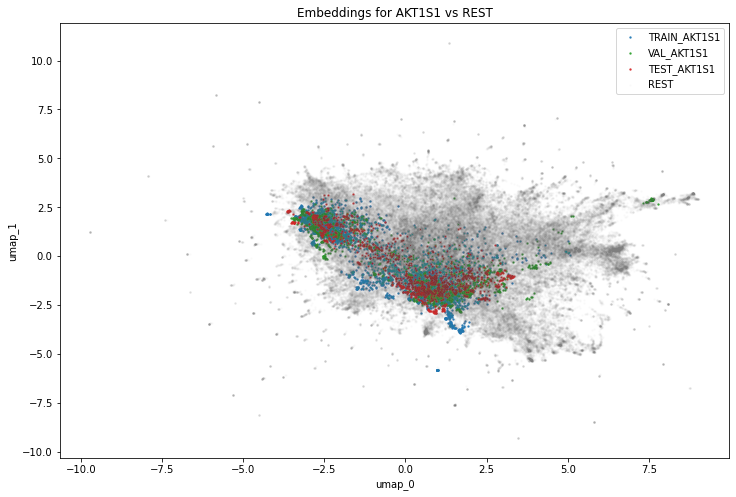

  2%|▏         | 1/42 [00:00<00:28,  1.45it/s]

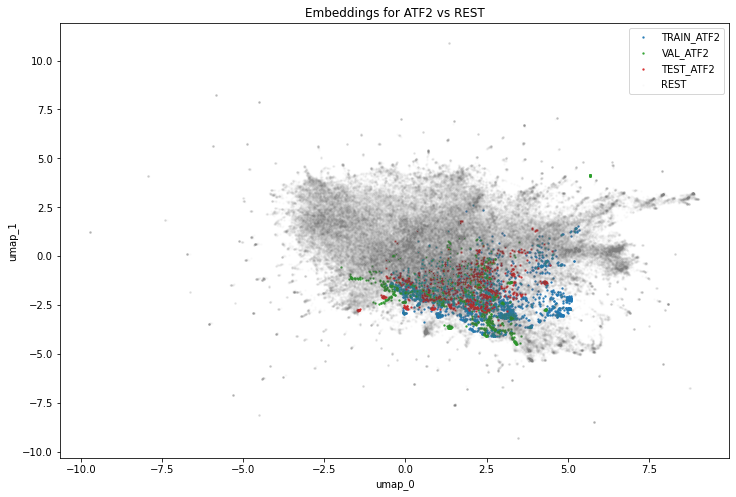

  5%|▍         | 2/42 [00:01<00:27,  1.44it/s]

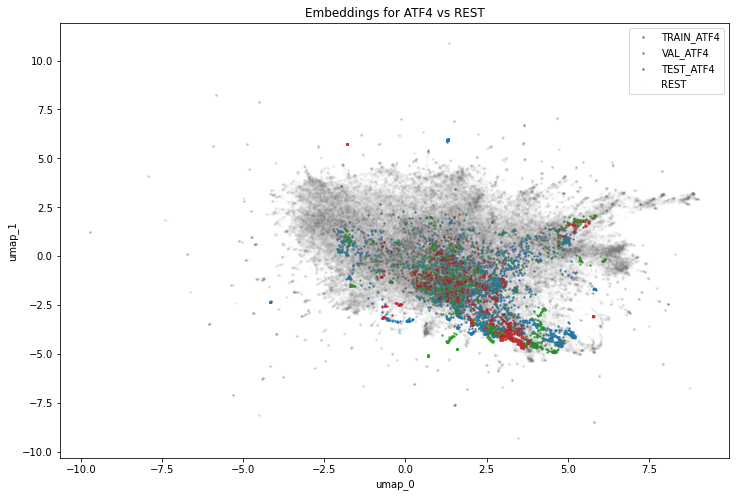

  7%|▋         | 3/42 [00:02<00:27,  1.44it/s]

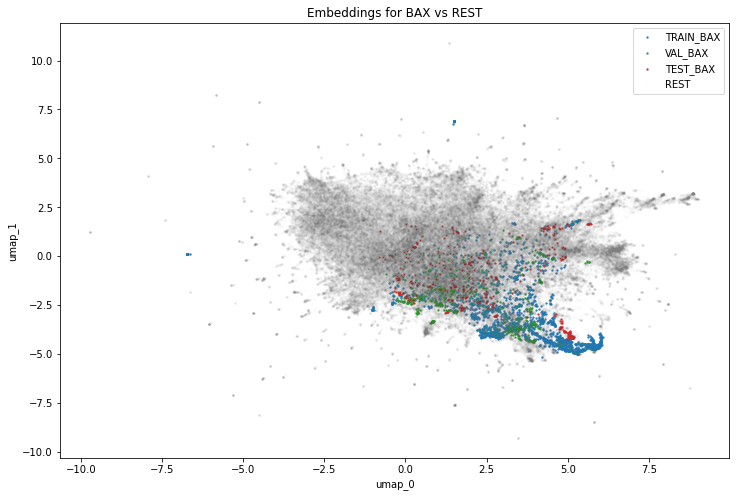

 10%|▉         | 4/42 [00:02<00:26,  1.45it/s]

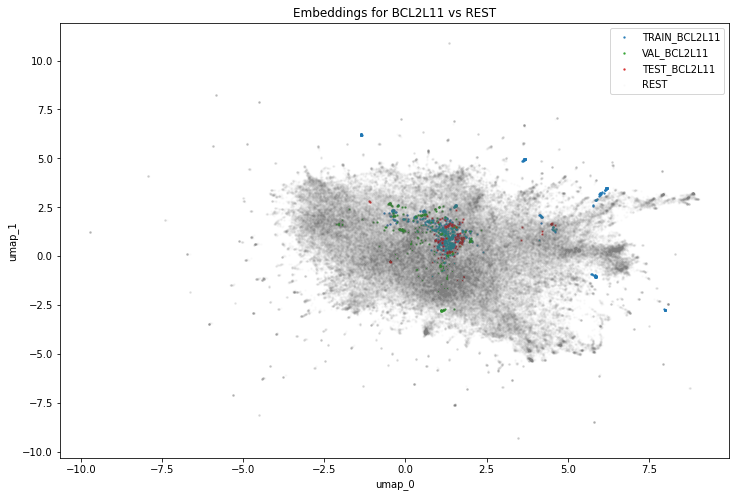

 12%|█▏        | 5/42 [00:03<00:25,  1.43it/s]

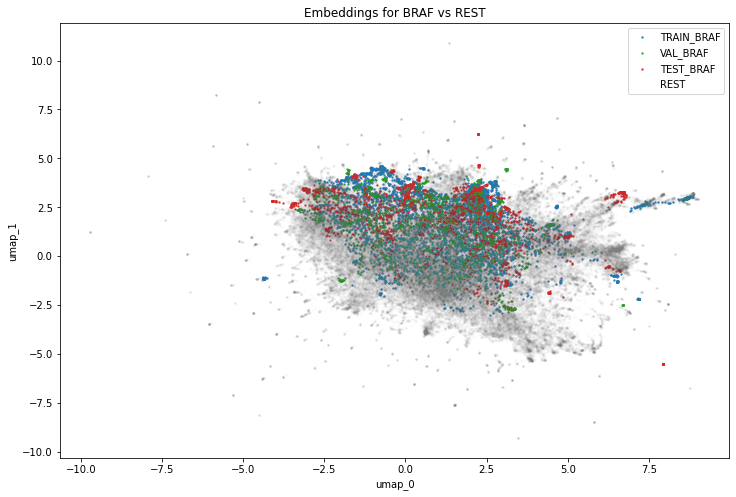

 14%|█▍        | 6/42 [00:04<00:25,  1.44it/s]

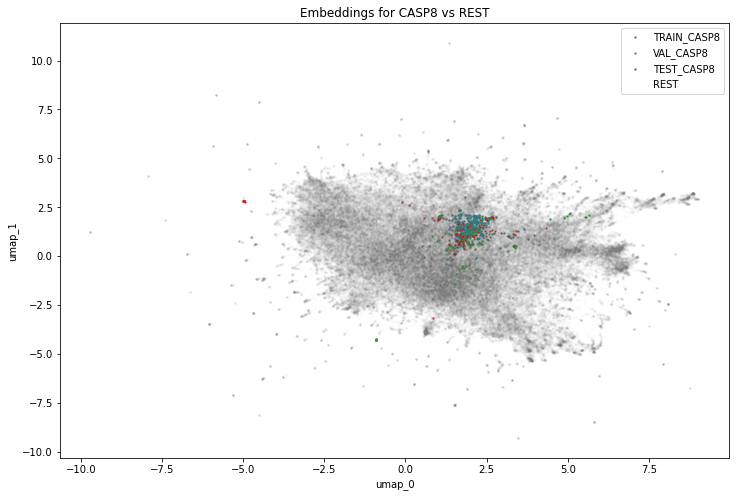

 17%|█▋        | 7/42 [00:04<00:24,  1.43it/s]

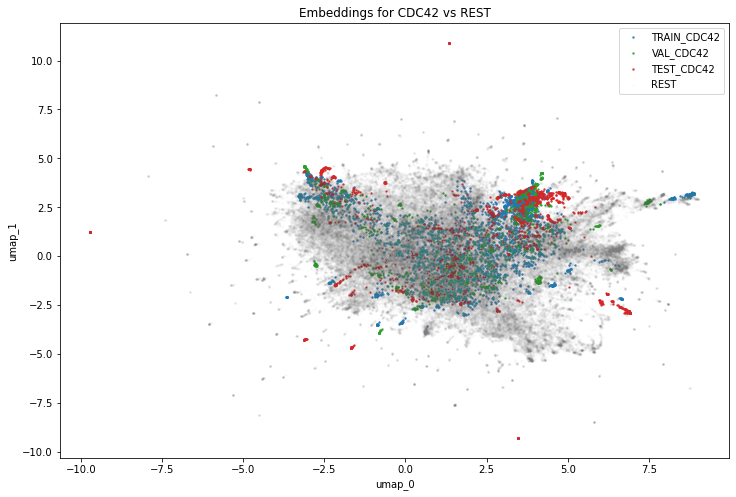

 19%|█▉        | 8/42 [00:05<00:23,  1.44it/s]

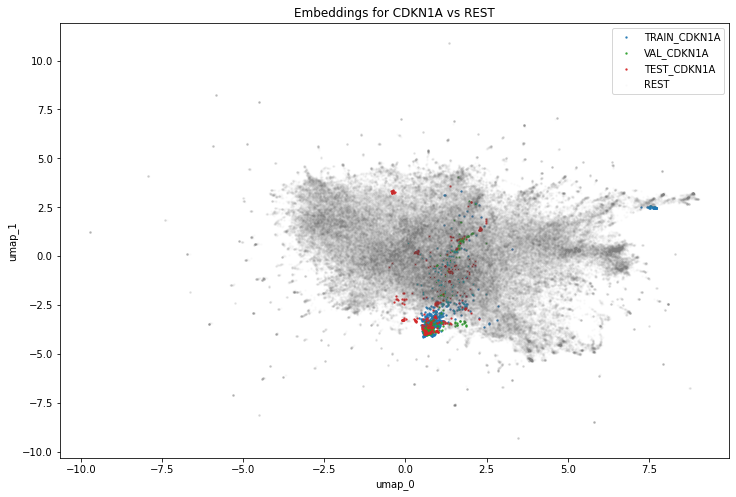

 21%|██▏       | 9/42 [00:06<00:22,  1.44it/s]

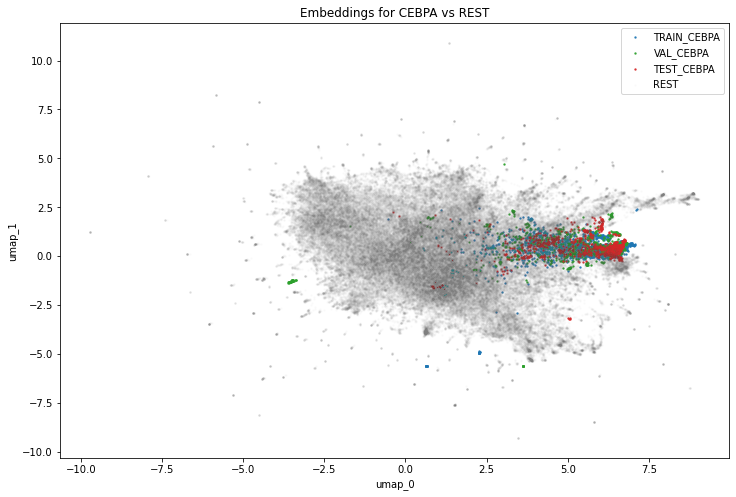

 24%|██▍       | 10/42 [00:06<00:22,  1.44it/s]

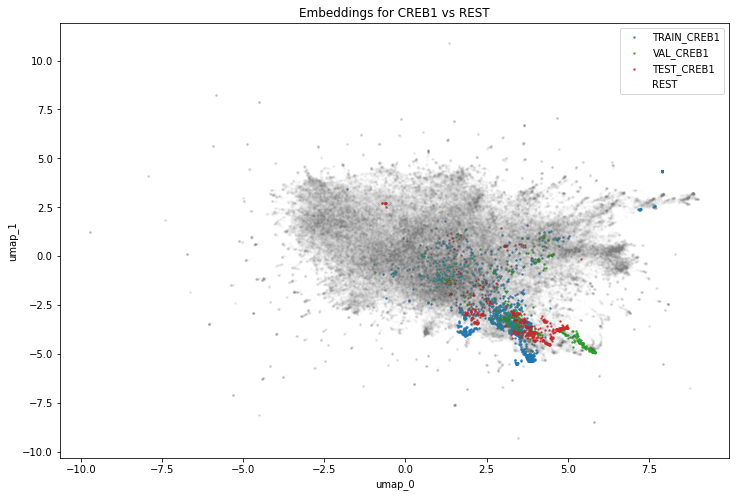

 26%|██▌       | 11/42 [00:07<00:21,  1.43it/s]

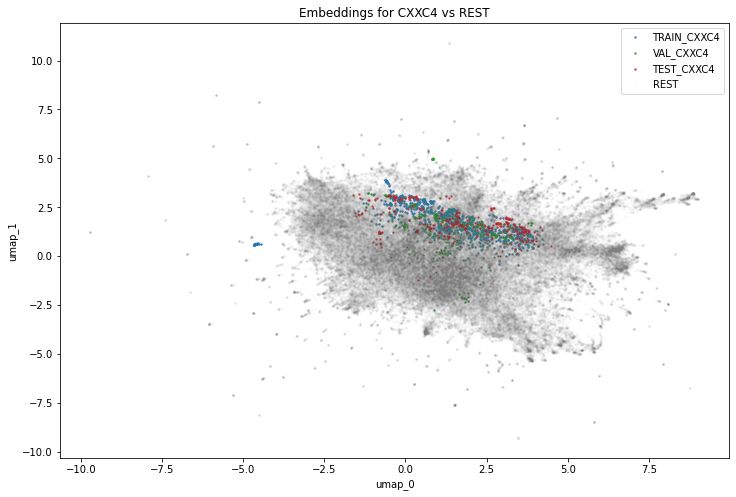

 29%|██▊       | 12/42 [00:08<00:20,  1.44it/s]

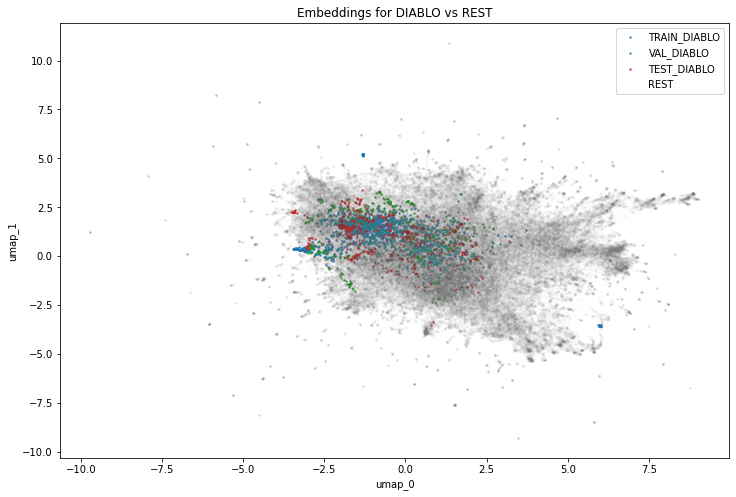

 31%|███       | 13/42 [00:09<00:20,  1.45it/s]

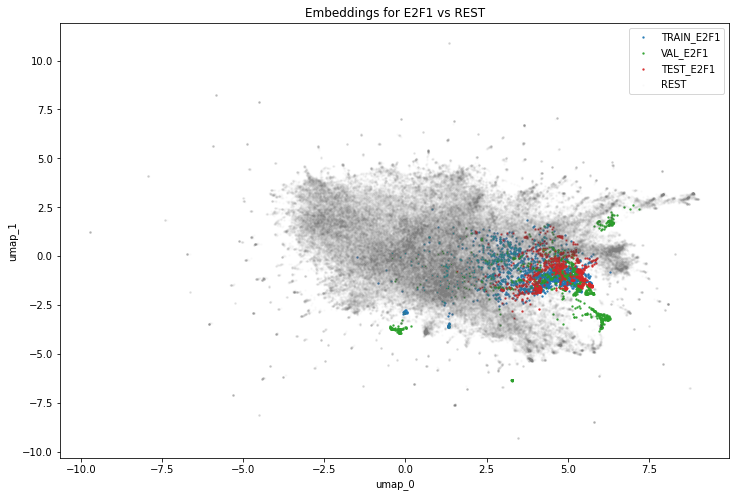

 33%|███▎      | 14/42 [00:09<00:19,  1.45it/s]

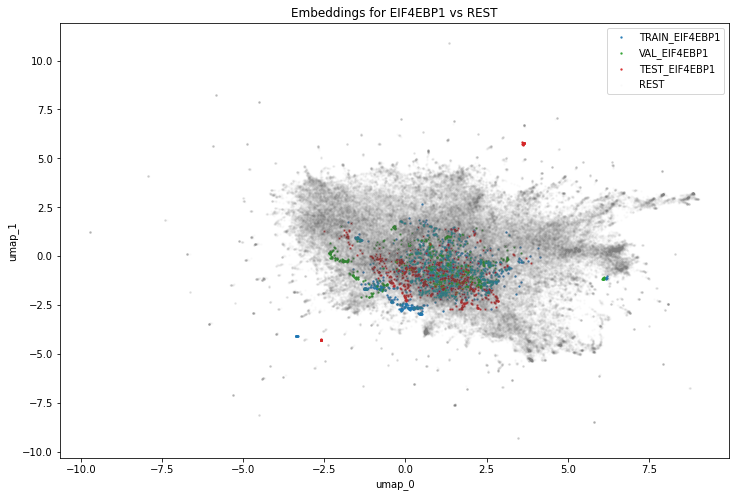

 36%|███▌      | 15/42 [00:10<00:18,  1.42it/s]

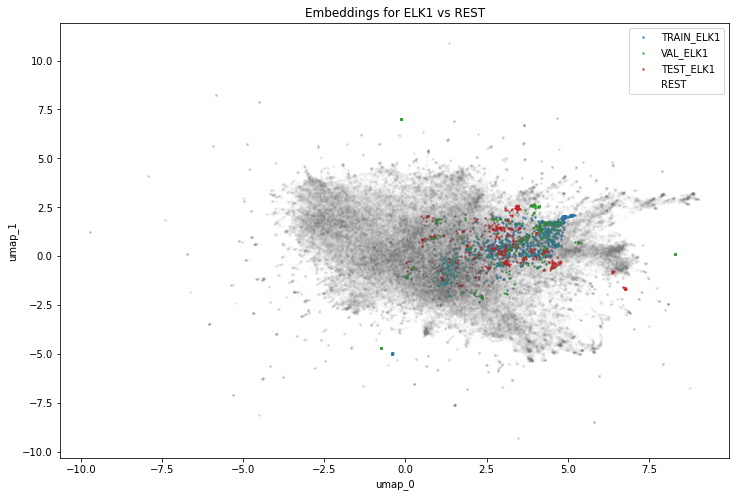

 38%|███▊      | 16/42 [00:11<00:18,  1.42it/s]

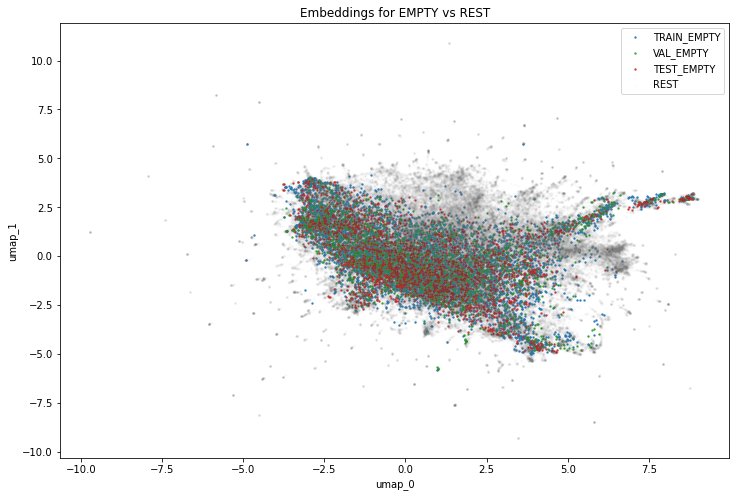

 40%|████      | 17/42 [00:11<00:17,  1.43it/s]

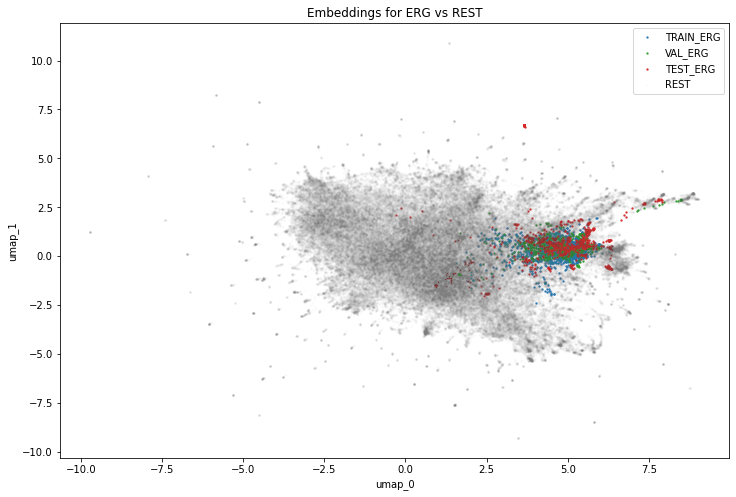

 43%|████▎     | 18/42 [00:12<00:16,  1.43it/s]

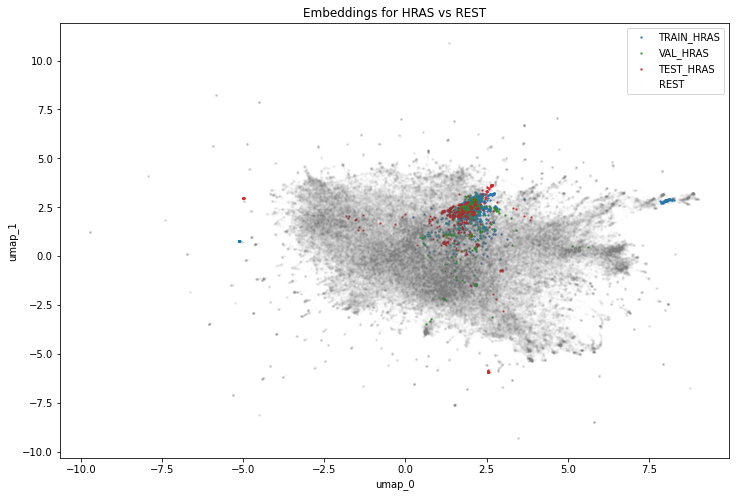

 45%|████▌     | 19/42 [00:13<00:18,  1.27it/s]

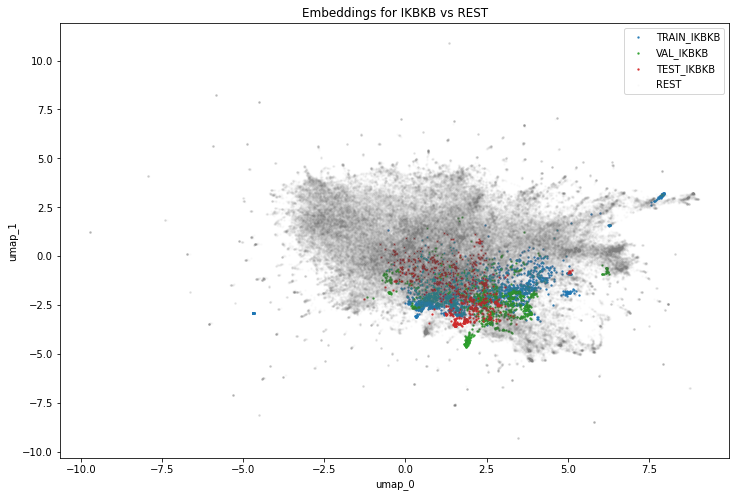

 48%|████▊     | 20/42 [00:14<00:16,  1.31it/s]

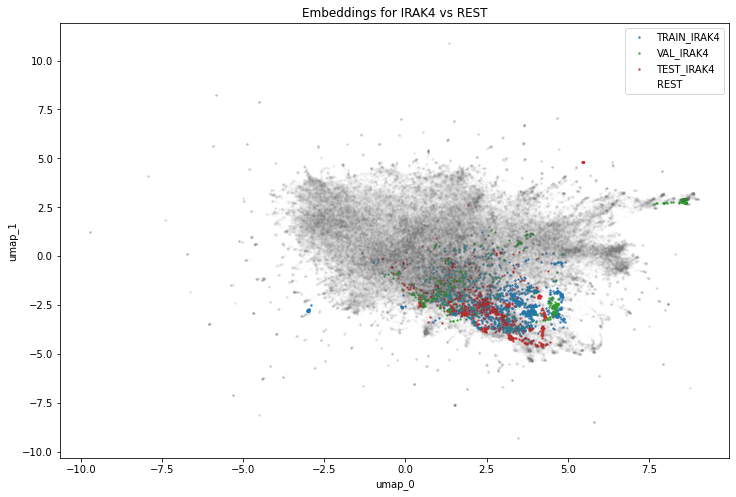

 50%|█████     | 21/42 [00:14<00:15,  1.34it/s]

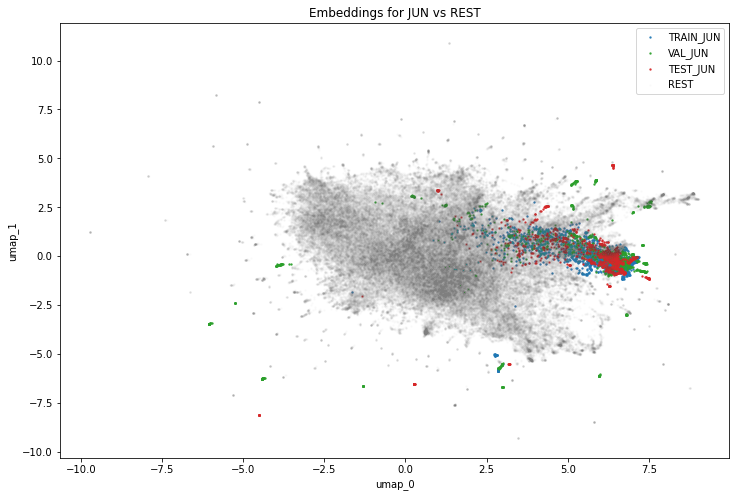

 52%|█████▏    | 22/42 [00:15<00:14,  1.36it/s]

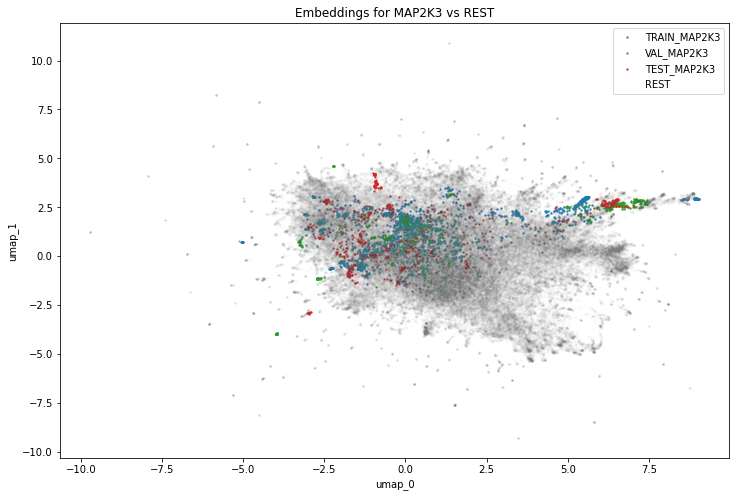

 55%|█████▍    | 23/42 [00:16<00:13,  1.37it/s]

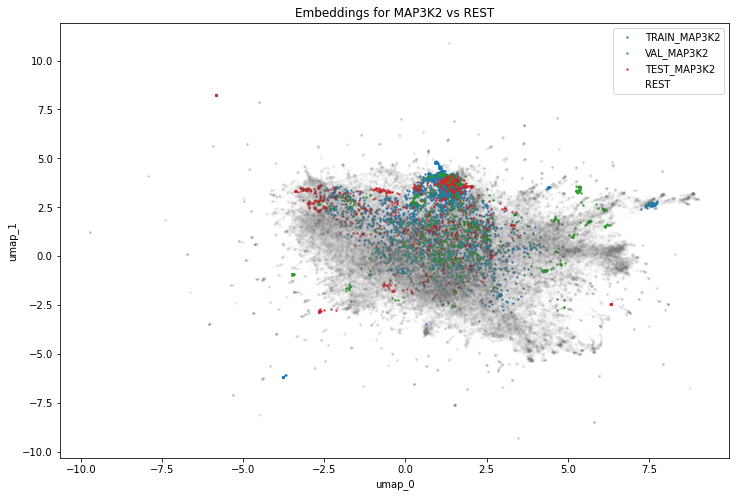

 57%|█████▋    | 24/42 [00:17<00:13,  1.38it/s]

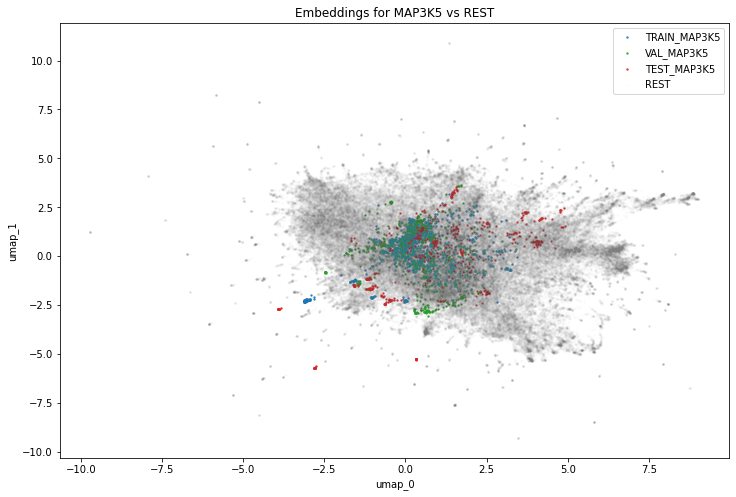

 60%|█████▉    | 25/42 [00:17<00:12,  1.39it/s]

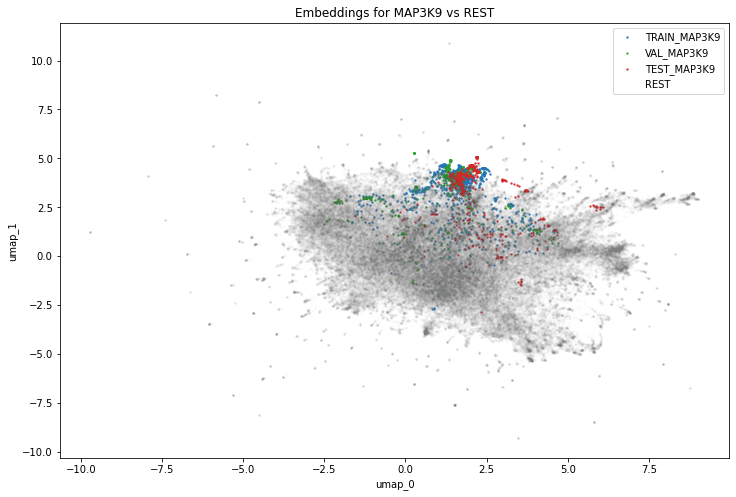

 62%|██████▏   | 26/42 [00:18<00:11,  1.40it/s]

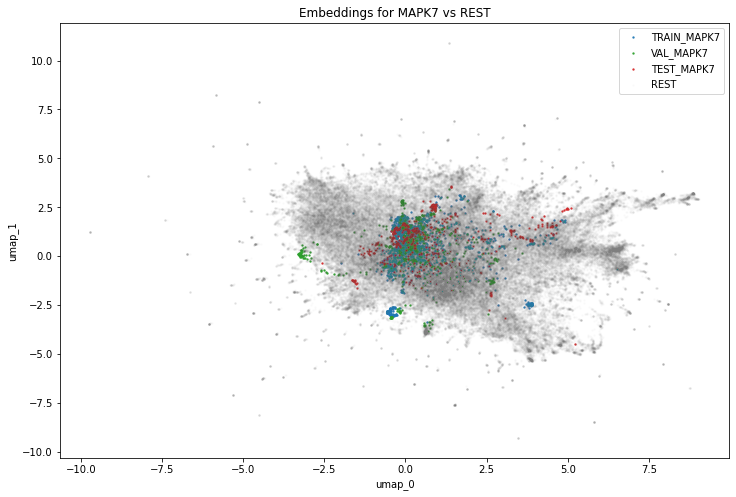

 64%|██████▍   | 27/42 [00:19<00:10,  1.41it/s]

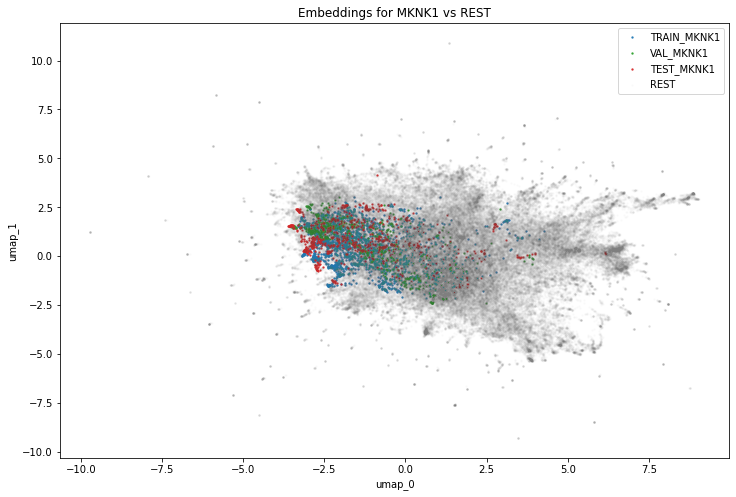

 67%|██████▋   | 28/42 [00:20<00:10,  1.34it/s]

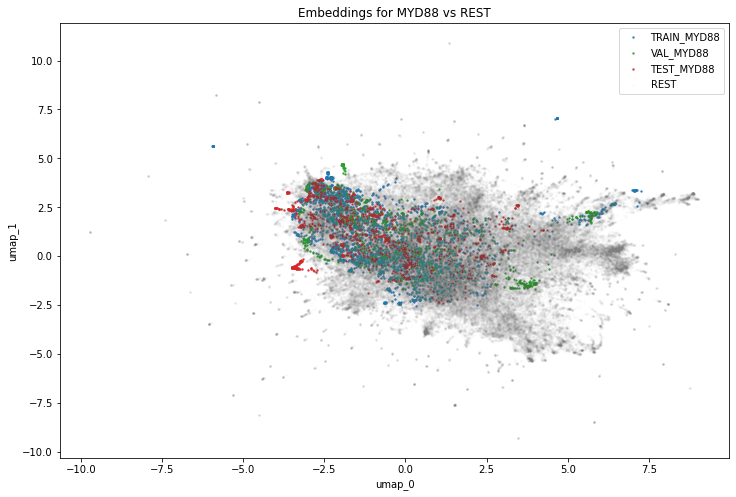

 69%|██████▉   | 29/42 [00:20<00:09,  1.37it/s]

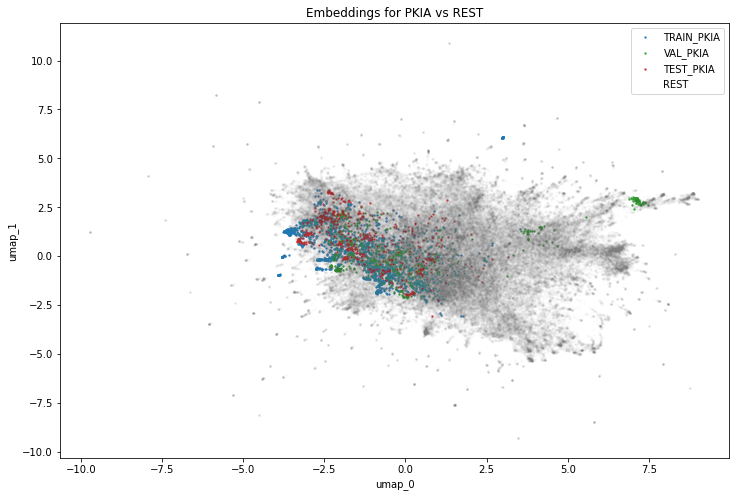

 71%|███████▏  | 30/42 [00:21<00:08,  1.38it/s]

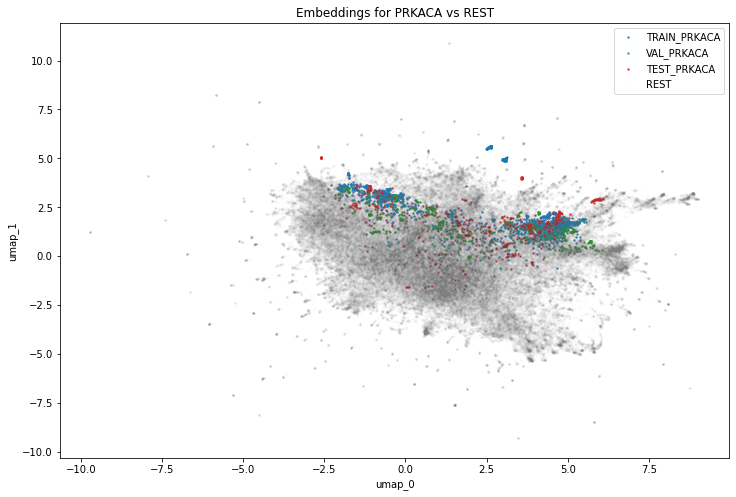

 74%|███████▍  | 31/42 [00:22<00:07,  1.40it/s]

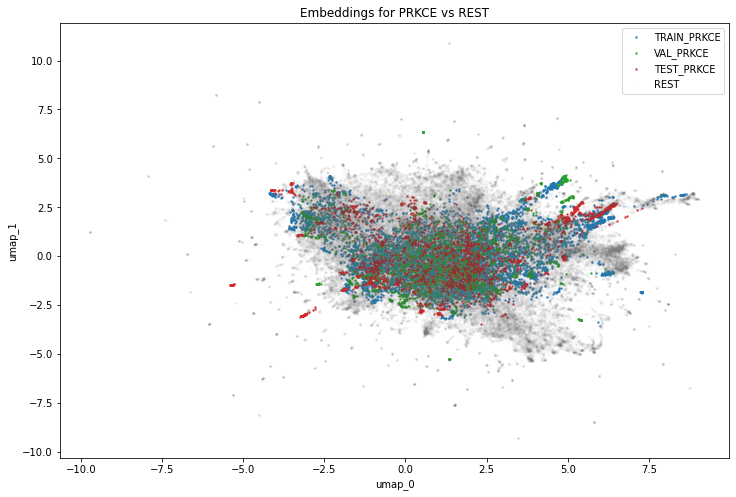

 76%|███████▌  | 32/42 [00:22<00:07,  1.41it/s]

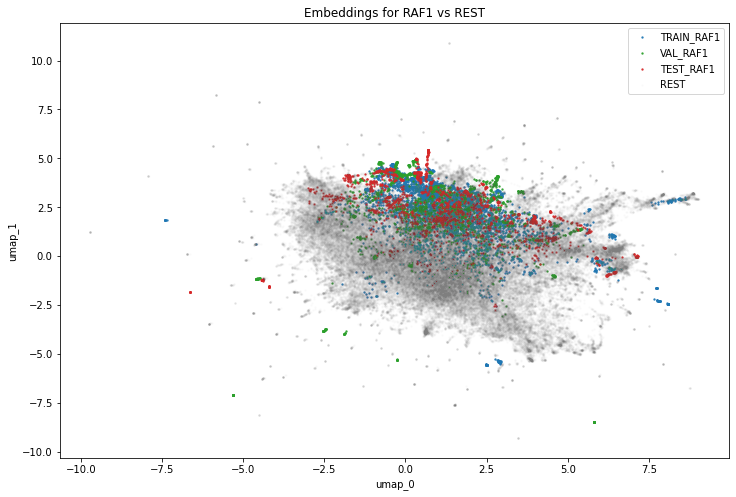

 79%|███████▊  | 33/42 [00:23<00:06,  1.41it/s]

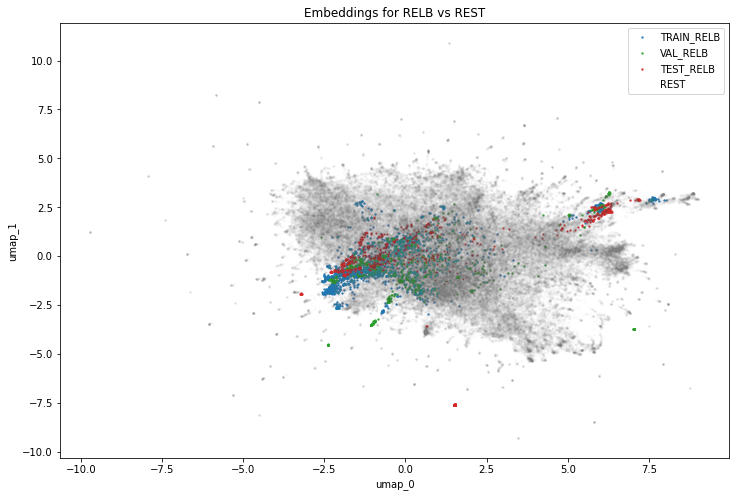

 81%|████████  | 34/42 [00:24<00:05,  1.42it/s]

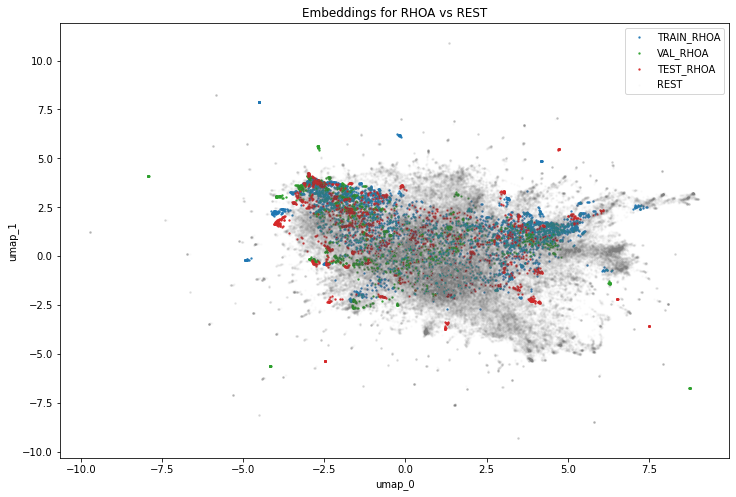

 83%|████████▎ | 35/42 [00:24<00:04,  1.43it/s]

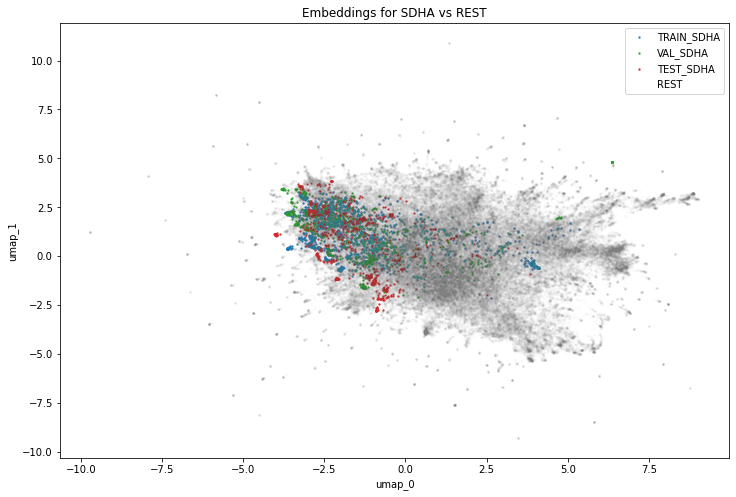

 86%|████████▌ | 36/42 [00:25<00:04,  1.43it/s]

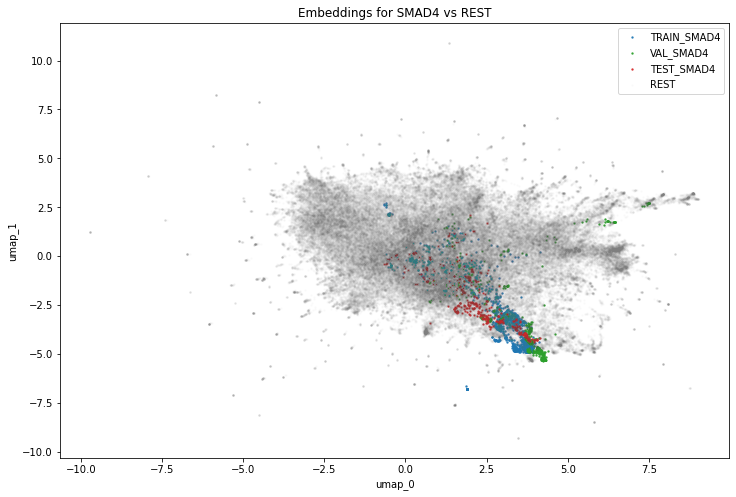

 88%|████████▊ | 37/42 [00:26<00:03,  1.44it/s]

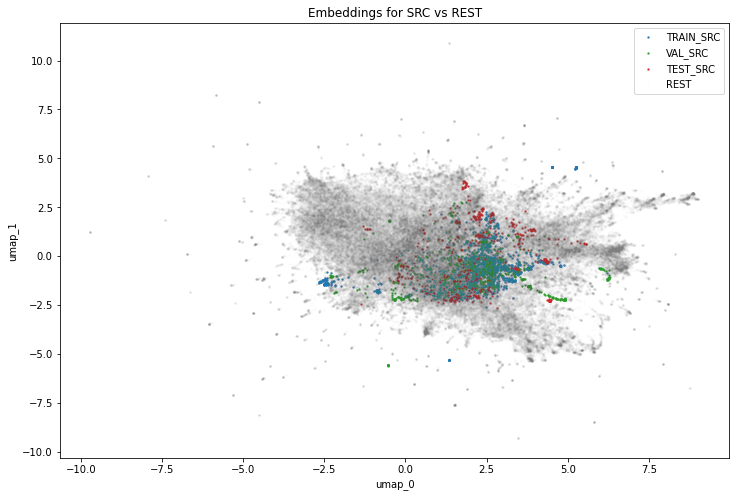

 90%|█████████ | 38/42 [00:27<00:02,  1.43it/s]

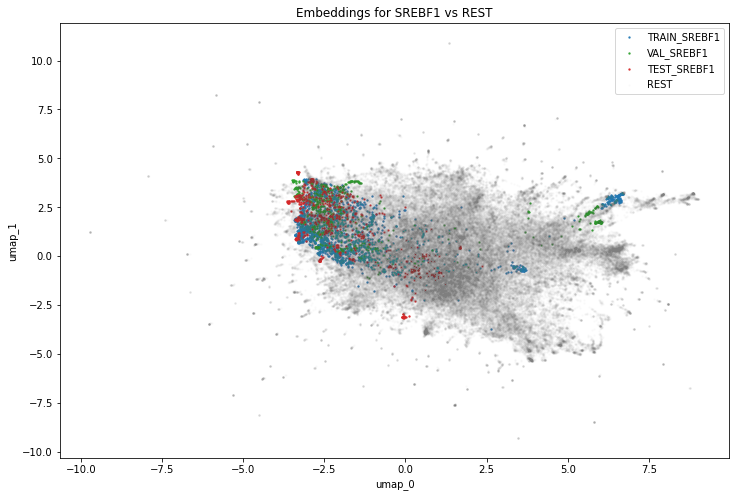

 93%|█████████▎| 39/42 [00:27<00:02,  1.43it/s]

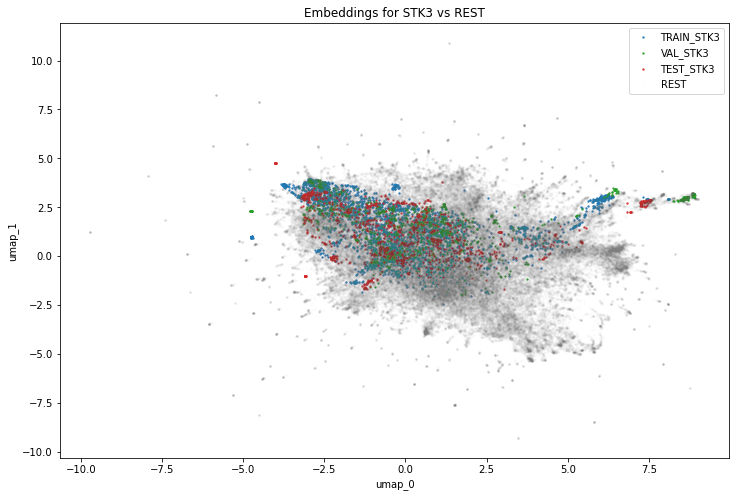

 95%|█████████▌| 40/42 [00:28<00:01,  1.43it/s]

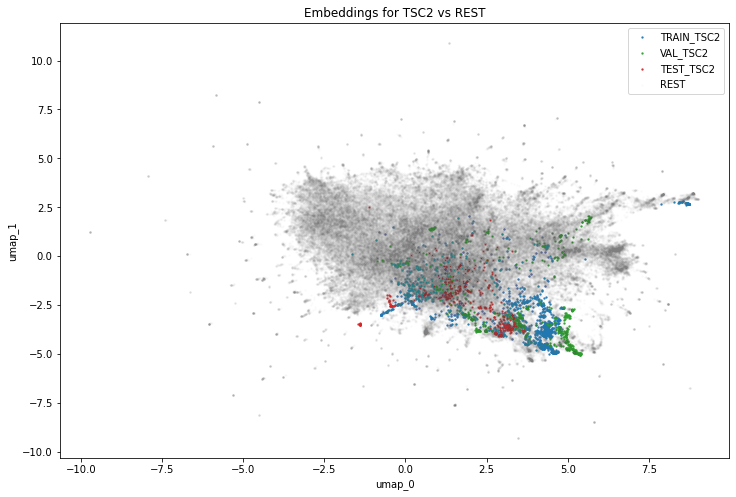

 98%|█████████▊| 41/42 [00:29<00:00,  1.31it/s]

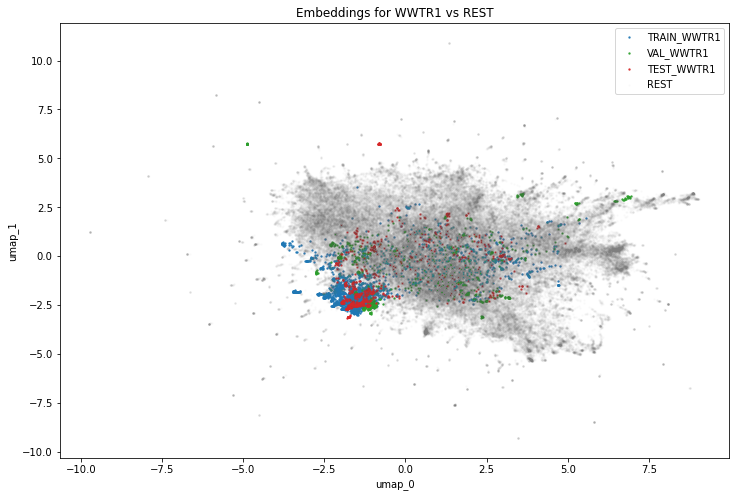

100%|██████████| 42/42 [00:30<00:00,  1.40it/s]


<IPython.core.display.Javascript object>

In [27]:
embs = plot_embs(latents, label_dict=label_dict, random_state=1234)